<center><h2>COMP40020: Human Language Technologies
Assignment 1 </h2></center>


#### imports

In [1]:
import nltk
import matplotlib
import re

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
from praw.models import MoreComments
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


### references:
-  https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

In [2]:
# pip install praw

In [3]:
ci = "HLTassignment1999" #your client id
cs = "p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA" #your client secret
ua = "busterorwha" #your user agent name
sub = "ireland" #the name of the subreddit (not including the 'r/')

In [4]:
# reddit = praw.Reddit(
#     client_id=ci,
#     client_secret=cs,
#     user_agent=ua
# )
reddit = praw.Reddit(client_id='fQeiW15Vp7PWost_U0QkaA',
                     client_secret='p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA',
                     user_agent='busterorwha')
# with open(sub+".txt", "w") as f:
    
#     #on the following line you can change top to any of the previously mentioned ways of sorting 
#     #and the limit to however many posts you would like to extract (here we extract just 10).
#     for post in reddit.subreddit(sub).top(limit=10): 
        
#         #this line collects the post titles
#         f.write(post.title+"\n")
        
#         #this line collects the post content
#         f.write(post.selftext+"\n")
        
#         #this section collects the comments
#         for comment in post.comments:
#             if isinstance(comment, MoreComments):
#                 continue
#             f.write(comment.body+"\n")

headlines = set()
headlines_newZealand = set()


In [5]:
for submission in reddit.subreddit('ireland').new(limit=966):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

965


In [6]:
for submission in reddit.subreddit('newzealand').new(limit=966):
    headlines_newZealand.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand))

966


### r/ireland

In [7]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.3182,
  'headline': 'Petrol and diesel prices to increase by 2c per litre from today [National Oil '
              'Reserves Agency (NORA) levy has been reinstated]',
  'neg': 0.0,
  'neu': 0.897,
  'pos': 0.103},
 {'compound': 0.0, 'headline': 'Which of ye was it lads?', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Ireland Thinks/Sunday Indo Dáil Éireann poll, 3 March 2023: SF: 29% (-2), FG: 21% '
              '(-1), FG 19% (+1), SD: 9% (+5), GP: 4% (n/c), PBP/S: 2% (-1), LAB: 3% (-1), AON: 3% '
              '(-1)',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### r/newzealand

In [8]:
sia = SIA()
results_nz = []

for line in headlines_newZealand:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results_nz.append(pol_score)

pprint(results_nz[:3], width=100)

[{'compound': 0.0, 'headline': 'Australian Passport times', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.1298,
  'headline': "Auckland Mayor Wayne Brown's diary almost empty day of the flood",
  'neg': 0.131,
  'neu': 0.869,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Does anyone know what kind of spider this is?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### dataframe r/ireland

In [9]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,0.897,0.103,0.3182,Petrol and diesel prices to increase by 2c per...
1,0.0,1.000,0.000,0.0000,Which of ye was it lads?
2,0.0,1.000,0.000,0.0000,"Ireland Thinks/Sunday Indo Dáil Éireann poll, ..."
3,0.0,1.000,0.000,0.0000,Any tips for a cycling on backroads?
4,0.0,1.000,0.000,0.0000,Muslim Sisters of Eire on Twitter [People from...


### defining positive and negative label

In [10]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,0.897,0.103,0.3182,Petrol and diesel prices to increase by 2c per...,1
1,0.0,1.000,0.000,0.0000,Which of ye was it lads?,0
2,0.0,1.000,0.000,0.0000,"Ireland Thinks/Sunday Indo Dáil Éireann poll, ...",0
3,0.0,1.000,0.000,0.0000,Any tips for a cycling on backroads?,0
4,0.0,1.000,0.000,0.0000,Muslim Sisters of Eire on Twitter [People from...,0


### dataframe r/newzealand

In [11]:
df_nz = pd.DataFrame.from_records(results_nz)
df_nz.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Australian Passport times
1,0.131,0.869,0.000,-0.1298,Auckland Mayor Wayne Brown's diary almost empt...
2,0.000,1.000,0.000,0.0000,Does anyone know what kind of spider this is?
3,0.000,0.841,0.159,0.1779,Growing momentum for ‘David and Goliath’ offic...
4,0.000,0.536,0.464,0.3818,Real wage growth 1990-2022


### defining positive and negative label

In [12]:
df_nz['label'] = 0
df_nz.loc[df_nz['compound'] > 0.2, 'label'] = 1
df_nz.loc[df_nz['compound'] < -0.2, 'label'] = -1
df_nz.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Australian Passport times,0
1,0.131,0.869,0.000,-0.1298,Auckland Mayor Wayne Brown's diary almost empt...,0
2,0.000,1.000,0.000,0.0000,Does anyone know what kind of spider this is?,0
3,0.000,0.841,0.159,0.1779,Growing momentum for ‘David and Goliath’ offic...,0
4,0.000,0.536,0.464,0.3818,Real wage growth 1990-2022,1


### example of positive and neg headlines r/ireland

In [13]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Petrol and diesel prices to increase by 2c per litre from today [National Oil Reserves Agency (NORA) levy has been reinstated]',
 'Tesla owners in Ireland: is it a good buy?',
 'NCT free test review raises ‘serious questions’, Road Safety Authority told',
 "I'm looking to buy a 'live edge' treated wood block to mount a sink on, have found one on Etsy (see below) but would like an Irish one!",
 'Do guys in Ireland enjoy lip filler?']

Negative headlines:

['Around 2,000 badgers illegally killed every year in NI',
 'Domestic economy entered technical recession at end of last year',
 'Anyone here travelled to Brazil recently and if so did u need to show negative PCR in Brazilian airport?',
 'UPATE--I got Tired of being fat & Ugly. Today I managed a Full Murph for the first time.',
 'Ireland vulnerable to Russian espionage with many spy agents ‘likely’ to be across the country already']


### example of positive and neg headlines r/newzealand

In [14]:
print("Positive headlines:\n")
pprint(list(df_nz[df_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df_nz[df_nz['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Real wage growth 1990-2022',
 'Participation award of the week goes to!',
 'The amount of New Zealanders who support Russia is concerning',
 'New Zealand needs to set up racing tracks for the public free of charge',
 'HdPA Security Guards']

Negative headlines:

["NZ's Nightmare Scenario In Ukraine War",
 "Defence Minister Andrew Little says military 'under pressure' as Pacific becomes contested",
 'does the certificate of particulars show if your drivers license is suspended?',
 'Rachel Smalley: Campbell’s comments don’t impact the lives of patients. Pharmac’s failings do.',
 'Does workplace ostracism & cliquey-ness exist in corporate/white collar New Zealand, and have you experienced it as a shy/socially anxious person?']


### looking at value counts r/ireland

In [15]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    524
 1    235
-1    206
Name: label, dtype: int64
 0    54.300518
 1    24.352332
-1    21.347150
Name: label, dtype: float64


### looking at value counts r/newzealand

In [16]:
print(df_nz.label.value_counts())
print(df_nz.label.value_counts(normalize=True) * 100)

 0    565
-1    214
 1    187
Name: label, dtype: int64
 0    58.488613
-1    22.153209
 1    19.358178
Name: label, dtype: float64


### graph comparing results 

code adapted from: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged 

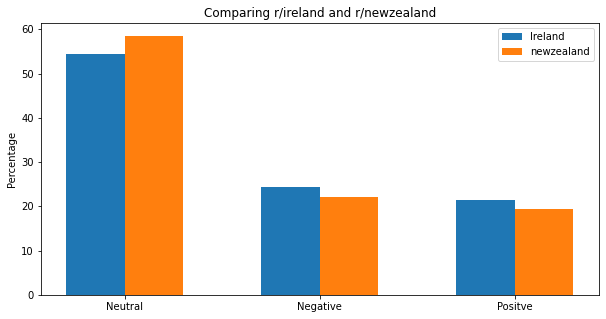

In [32]:

N = 3

blue_bar = (counts_ireland)
orange_bar = (counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Newzealand

In [34]:
# fig, ax = plt.subplots(figsize=(8, 8))

# counts_nz = df_nz.label.value_counts(normalize=True) * 100

# sns.barplot(x=counts_nz.index, y=counts_nz, ax=ax)

# ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
# ax.set_ylabel("Percentage")

# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 8))

# counts_ireland = df.label.value_counts(normalize=True) * 100

# sns.barplot(x=counts_ireland.index, y=counts_ireland, ax=ax)

# ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
# ax.set_ylabel("Percentage")

# plt.show()